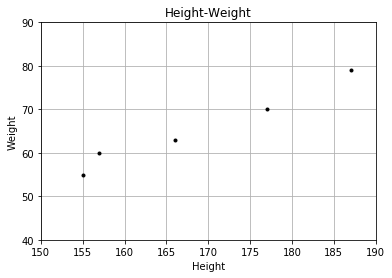

预测身高180同学的体重：73.28


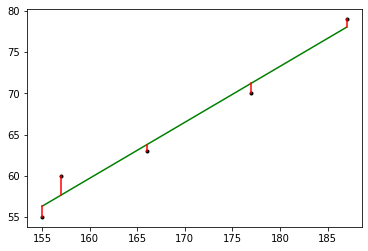

残差平方和: 229.341233
R方：  0.8984224876344138


In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 该函数用于创建plot图形
def runplt():
    plt.figure()
    plt.title(u'Height-Weight')
    plt.xlabel(u'Height')
    plt.ylabel(u'Weight')
    plt.axis([150, 190, 40, 90])
    plt.grid(True)
    return plt


plt = runplt()      # 引用函数
x = [[155], [157], [166], [177], [187]]   # 伪造的身高
y = [[55], [60], [63], [70], [79]]   # 伪造的体重
plt.plot(x, y, 'k.')

plt.show()     

# 创建并拟合模型
model = LinearRegression()         
model.fit(x, y)

print('预测身高180同学的体重：%.2f' % model.predict(np.array([180]).reshape(-1, 1))[0])

# 残差预测值
y2 = model.predict(x)
plt.plot(x, y, 'k.')
plt.plot(x, y2, 'g-')

for idx, x in enumerate(x):
    plt.plot([x, x], [y[idx], y2[idx]], 'r-')

plt.show()

print('残差平方和: %f' % np.mean((model.predict([x]) - y)**2))

## 测试集
x_test = [[156], [163], [166], [170], [188]]
y_test = [[56], [63], [63], [72], [80]]
print('R方： ', model.score(x_test, y_test))

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

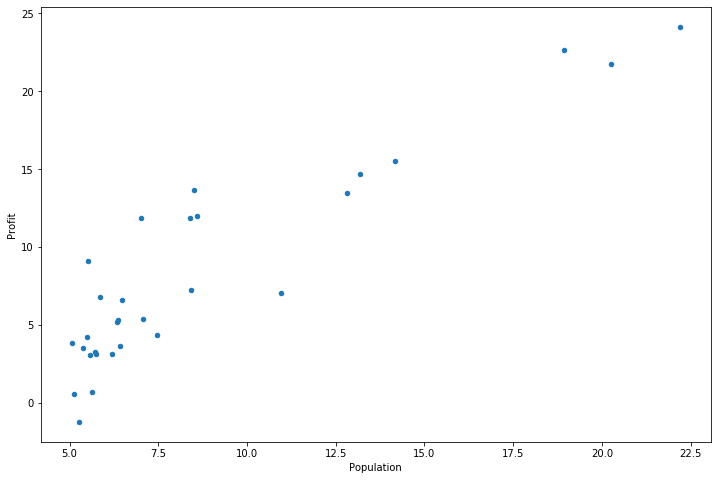

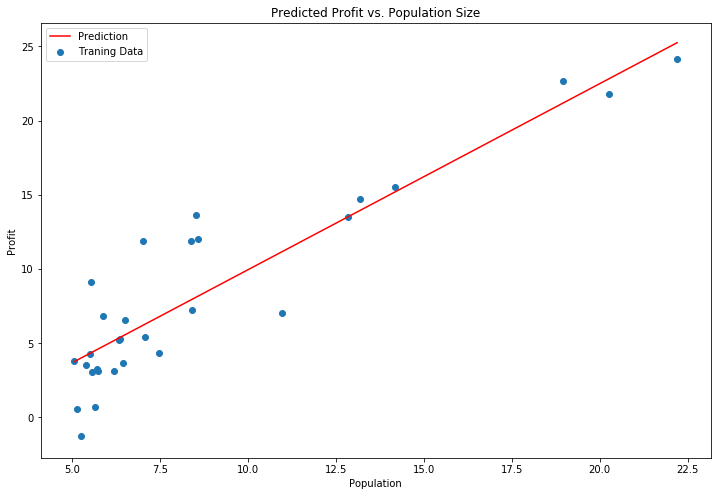

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# 读取数据，并可视化出出来
data = pd.read_csv('data.txt', header=None, names=['Population', 'Profit']) 
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12,8))


# 该函数用来计算预测模型误差
# 无循环是为了后面用矩阵运算以提高运算效率
def computeCost(X, y, theta): 
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

# 在数据集的前面加一栏
data.insert(0, 'Ones', 1)
# 设置X（训练数据）和y（目标变量）
cols = data.shape[1] 
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols]

# 从数据帧转换为numpy矩阵
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

X.shape
theta.shape
y.shape

computeCost(X, y, theta)

# 梯度下降算法函数
def gradientDescent(X, y, theta, alpha, iters): 
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

# 初始化变量以提高学习率和迭代
alpha = 0.01 
iters = 1000
# 执行梯度下降以“拟合”模型参数
g, cost = gradientDescent(X, y, theta, alpha, iters) 

computeCost(X, y, g)


# 查看结果，其中有条线表示我们的预测模型；
x = np.linspace(data.Population.min(), data.Population.max(), 100) 
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8)) 
ax.plot(x, f, 'r', label='Prediction') 
ax.scatter(data.Population, data.Profit, label='Traning Data') 
ax.legend(loc=2) 
ax.set_xlabel('Population') 
ax.set_ylabel('Profit') 
ax.set_title('Predicted Profit vs. Population Size')


